# Hello Object Detection with YOLO & PyTorch

In [ ]:
# Prerequisites and dependencies
import numpy as np
import pandas as pd

import torch
import torchvision.transforms as T

# !pip install torch torchvision torchaudio numpy
# !pip install ultralytics

### Functions for Main Tasks

In [12]:
def load_yolov5():
    """
    Load pretrained YOLOv5 model from Ultralytics

    Returns:
        model (torch.nn.Module): loaded YOLOv5 model
    """

    # Load Ultralytics model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

    # Set model to evaluation mode, disable dropout and batch normalization
    model.eval()

    return model


def detect_objects(model, image_file_path):
    """
    Perform object detection with the passed on model

    Args:
        model (torch.nn.Module): model to use for detection
        image_file_path (str): file path to the image

    Returns:
        results: detection results with bounding boxes, confidences, and class IDs
    """

    # Execute model
    results = model(image_file_path)

    return results    


def show_results(results):
    """
    Displays and prints the detection results

    Args:
        results: results from object detection model
    """
    
    # Print results in text
    results.print()

    # Show the image with bounding boxes
    results.show()

    # Access raw results
    # E.g., results.xyxy[0] contains bounding boxes for the first image
    
    # Load bounding boxes to pandas DataFrame
    df = results.pandas().xyxy[0]
    print(df)
    

### Perform Detection

Using cache found in C:\Users\Jari/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-10-24 Python-3.12.7 torch-2.8.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
C:\Users\Jari/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 852x1280 1 person, 2 horses, 1 umbrella, 1 baseball bat
Speed: 10.5ms pre-process, 53.2ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


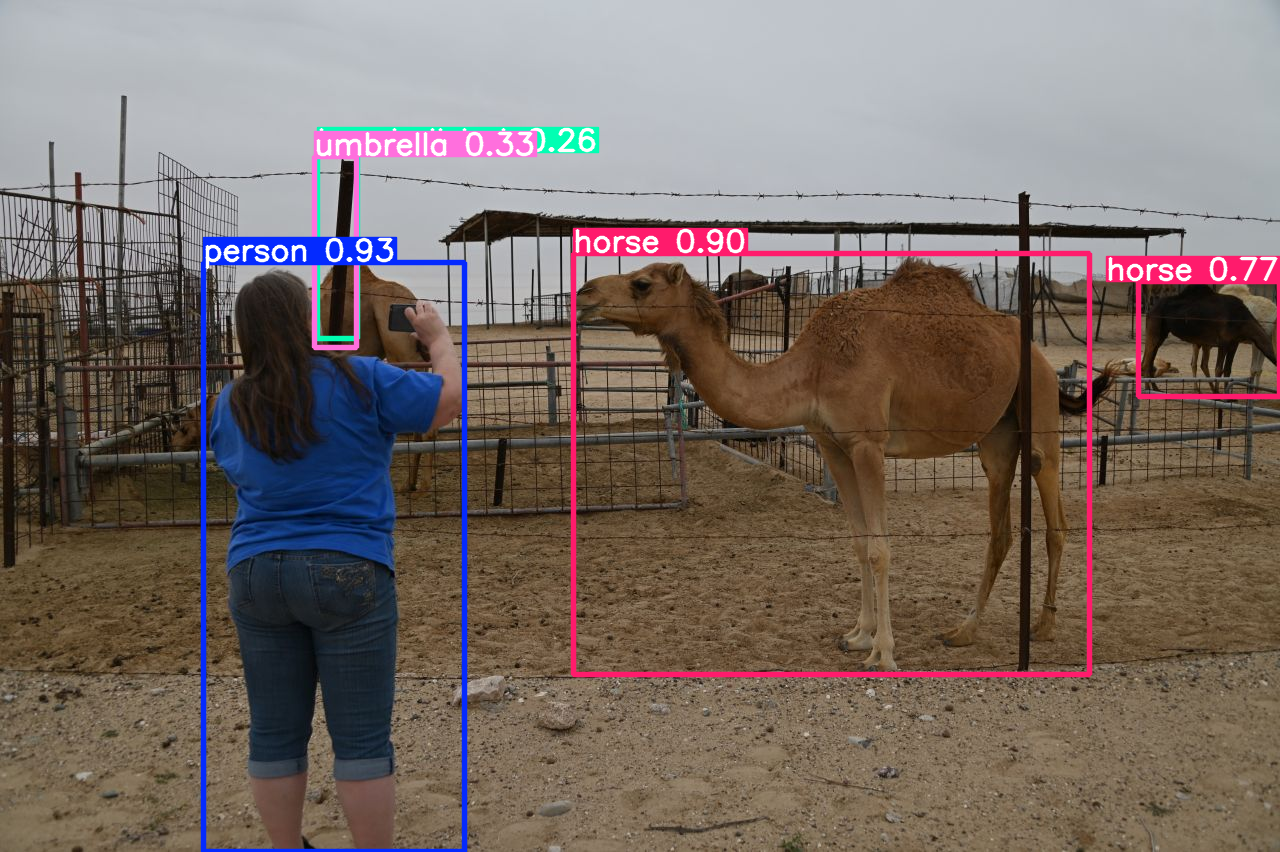

          xmin        ymin         xmax        ymax  confidence  class  \
0   203.069214  262.360962   464.720337  851.470581    0.925315      0   
1   573.584595  253.642944  1089.810425  674.135864    0.901375     17   
2  1138.661499  281.434540  1279.967163  396.852814    0.774027     17   
3   314.263733  156.125336   356.006653  347.965302    0.331422     25   
4   317.830231  152.567108   357.305939  338.315826    0.263107     34   

           name  
0        person  
1         horse  
2         horse  
3      umbrella  
4  baseball bat  


In [13]:
# Load YOLOv5
model = load_yolov5()

# Load image
image_file_path = "images/abu_dhabi_camel.jpg"

# Perform Object Detection
results = detect_objects(model, image_file_path)

# Show results
show_results(results)
